<a href="https://colab.research.google.com/github/jrgrajek/Capstone/blob/main/FRED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [235]:
!pip install fredapi > /dev/null 2>&1
!pip install plotly > /dev/null 2>&1

In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', None)
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

from fredapi import Fred

fred_key = '7831e50bc593c8f864c37a6d39938c69'






#1. Create the Fred Object

In [237]:
fred = Fred(api_key=fred_key)

#2. Search for economic data!

In [238]:
fred.search('S&P')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CSUSHPINSA,CSUSHPINSA,2024-12-25,2024-12-25,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2024-09-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2024-11-26 08:12:02-06:00,88,"For more information regarding the index, plea..."
CSUSHPISA,CSUSHPISA,2024-12-25,2024-12-25,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2024-09-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2024-11-26 08:12:04-06:00,78,"For more information regarding the index, plea..."
SP500,SP500,2024-12-25,2024-12-25,S&P 500,2014-12-26,2024-12-24,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-12-24 19:12:10-06:00,83,The observations for the S&P 500 represent the...
SPCS20RSA,SPCS20RSA,2024-12-25,2024-12-25,S&P CoreLogic Case-Shiller 20-City Composite H...,2000-01-01,2024-09-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2024-11-26 08:12:06-06:00,67,"For more information regarding the index, plea..."
SPCS20RNSA,SPCS20RNSA,2024-12-25,2024-12-25,S&P CoreLogic Case-Shiller 20-City Composite H...,2000-01-01,2024-09-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2024-11-26 08:12:28-06:00,33,"For more information regarding the index, plea..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CRDQARAPABIS,CRDQARAPABIS,2024-12-25,2024-12-25,"Total Credit to Private Non-Financial Sector, ...",1940-04-01,2024-04-01,"Quarterly, End of Quarter",Q,Billions of Argentine Pesos,Bil. of Argentine Pesos,Not Seasonally Adjusted,NSA,2024-12-14 15:35:15-06:00,1,"Credit is provided by domestic banks, all othe..."
QARPAMUSDA,QARPAMUSDA,2024-12-25,2024-12-25,"Total Credit to Private Non-Financial Sector, ...",1990-01-01,2024-04-01,"Quarterly, End of Quarter",Q,Billions of US Dollars,Bil. of US $,Not Seasonally Adjusted,NSA,2024-12-14 15:30:22-06:00,1,"Credit is provided by domestic banks, all othe..."
QCOPAMXDCA,QCOPAMXDCA,2024-12-25,2024-12-25,"Total Credit to Private Non-Financial Sector, ...",1996-10-01,2024-04-01,"Quarterly, End of Quarter",Q,Billions of Argentine Pesos,Bil. of Argentine Pesos,Not Seasonally Adjusted,NSA,2024-12-14 15:34:08-06:00,1,"Credit is provided by domestic banks, all othe..."


In [239]:
sp_search = fred.search('S&P', order_by='popularity')

In [240]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2024-12-25,2024-12-25,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2024-12-23,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-12-24 09:11:14-06:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2024-12-25,2024-12-25,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2024-09-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2024-11-26 08:12:02-06:00,88,"For more information regarding the index, plea..."
SP500,SP500,2024-12-25,2024-12-25,S&P 500,2014-12-26,2024-12-24,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-12-24 19:12:10-06:00,83,The observations for the S&P 500 represent the...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2024-12-25,2024-12-25,ICE BofA US High Yield Index Effective Yield,1996-12-31,2024-12-23,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-12-24 09:11:17-06:00,82,This data represents the effective yield of th...
BAMLC0A0CM,BAMLC0A0CM,2024-12-25,2024-12-25,ICE BofA US Corporate Index Option-Adjusted Sp...,1996-12-31,2024-12-23,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-12-24 09:17:01-06:00,78,The ICE BofA Option-Adjusted Spreads (OASs) ar...


#3. Pull Raw Data

In [241]:
sp500 = fred.get_series('SP500')

<Axes: title={'center': 'S&P 500'}>

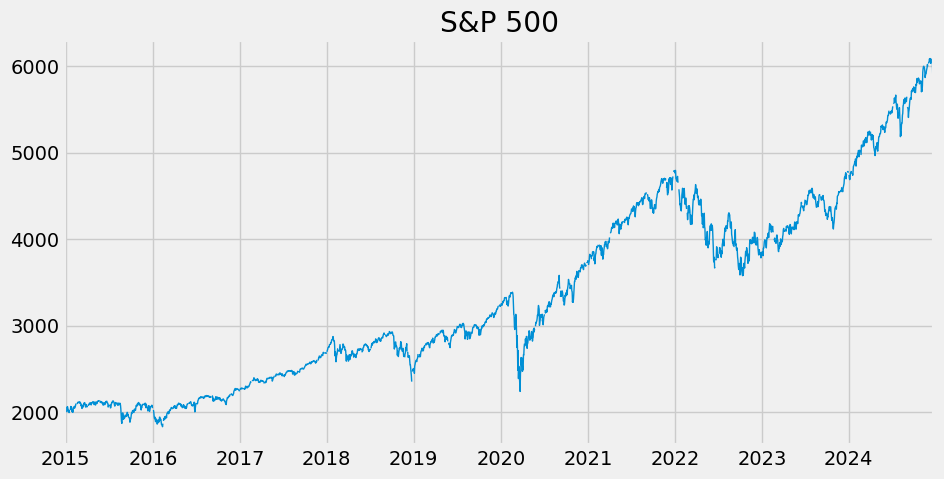

In [242]:
sp500.plot(figsize=(10,5), title = 'S&P 500', lw=1)

#4. Pull and Join Multiple Data Series

In [243]:
unemployment_results = fred.search('unemployment')

In [244]:
unemployment_results

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2024-12-25,2024-12-25,Unemployment Rate,1948-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-06 07:47:02-06:00,95,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2024-12-25,2024-12-25,Unemployment Rate,1948-01-01,2024-11-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-12-06 07:46:03-06:00,58,The unemployment rate represents the number of...
UNEMPLOY,UNEMPLOY,2024-12-25,2024-12-25,Unemployment Level,1948-01-01,2024-11-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2024-12-06 07:47:06-06:00,71,The series comes from the 'Current Population ...
NROU,NROU,2024-12-25,2024-12-25,Noncyclical Rate of Unemployment,1949-01-01,2034-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2024-07-01 12:01:04-05:00,69,"Starting with the July, 2021 report: An Update..."
CCSA,CCSA,2024-12-25,2024-12-25,Continued Claims (Insured Unemployment),1967-01-07,2024-12-07,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2024-12-19 07:33:02-06:00,74,"Continued claims, also referred to as insured ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LAUCN340030000000003A,LAUCN340030000000003A,2024-12-25,2024-12-25,"Unemployment Rate in Bergen County, NJ",1990-01-01,2023-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2024-05-01 10:48:38-05:00,0,These data come from the Current Population Su...
LMUNRRTTLUM156S,LMUNRRTTLUM156S,2024-12-25,2024-12-25,Infra-Annual Registered Unemployment and Job V...,1995-01-01,2023-12-01,Monthly,M,Growth rate previous period,Growth rate previous period,Seasonally Adjusted,SA,2024-04-10 11:07:38-05:00,5,OECD Data Filters: REF_AREA: LUX MEASURE: REG...
LNS14000315,LNS14000315,2024-12-25,2024-12-25,Unemployment Rate - Married Women,1955-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-06 07:47:33-06:00,9,To obtain estimates of women worker employment...


In [245]:
unrate = fred.get_series('UNRATE')

<Axes: title={'center': 'Unemployment Rate'}>

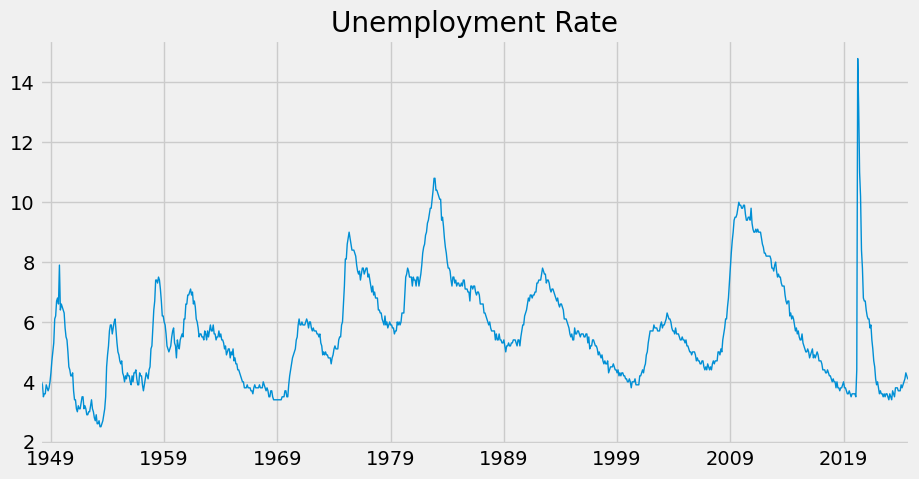

In [246]:
unrate.plot(figsize=(10,5), title = 'Unemployment Rate', lw=1)

In [247]:
# Perform the search
unemp_df = fred.search('unemployment rate state', filter=('frequency', 'Monthly'))


In [248]:
unemp_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2024-12-25,2024-12-25,Unemployment Rate,1948-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-06 07:47:02-06:00,95,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2024-12-25,2024-12-25,Unemployment Rate,1948-01-01,2024-11-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-12-06 07:46:03-06:00,58,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2024-12-25,2024-12-25,Unemployment Rate - Black or African American,1972-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-06 07:47:04-06:00,72,The series comes from the 'Current Population ...
UNEMPLOY,UNEMPLOY,2024-12-25,2024-12-25,Unemployment Level,1948-01-01,2024-11-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2024-12-06 07:47:06-06:00,71,The series comes from the 'Current Population ...
LNU03000000,LNU03000000,2024-12-25,2024-12-25,Unemployment Level,1948-01-01,2024-11-01,Monthly,M,Thousands of Persons,Thous. of Persons,Not Seasonally Adjusted,NSA,2024-12-06 07:46:15-06:00,27,The series comes from the 'Current Population ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INBART5URN,INBART5URN,2024-12-25,2024-12-25,"Unemployment Rate in Bartholomew County, IN",1990-01-01,2024-10-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-11-27 10:18:07-06:00,2,These data come from the Current Population Su...
MOPRURN,MOPRURN,2024-12-25,2024-12-25,"Unemployment Rate in Perry County, MO",1990-01-01,2024-10-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-11-27 10:29:31-06:00,2,These data come from the Current Population Su...
PENS812UR,PENS812UR,2024-12-25,2024-12-25,Unemployment Rate in Pensacola-Ferry Pass-Bren...,1990-01-01,2024-10-01,Monthly,M,Percent,%,Smoothed Seasonally Adjusted,SSA,2024-11-27 13:33:40-06:00,1,None


In [249]:
unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2024-12-25,2024-12-25,Unemployment Rate,1948-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-06 07:47:02-06:00,95,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2024-12-25,2024-12-25,Unemployment Rate - Black or African American,1972-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-06 07:47:04-06:00,72,The series comes from the 'Current Population ...
U6RATE,U6RATE,2024-12-25,2024-12-25,"Total Unemployed, Plus All Persons Marginally ...",1994-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-06 07:47:08-06:00,67,The series comes from the 'Current Population ...
CAUR,CAUR,2024-12-25,2024-12-25,Unemployment Rate in California,1976-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-23 09:31:02-06:00,64,None
TXUR,TXUR,2024-12-25,2024-12-25,Unemployment Rate in Texas,1976-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-23 09:31:03-06:00,56,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M08311USM156SNBR,M08311USM156SNBR,2024-12-25,2024-12-25,"Unemployment Rate, Married Males, Spouse Prese...",1954-11-01,1968-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:28:17-05:00,6,Beginning In 1960 Data Include Alaska And Hawa...
LNS13008397,LNS13008397,2024-12-25,2024-12-25,"Of Total Unemployed, Percent Unemployed Less T...",1948-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-06 07:47:39-06:00,6,The series comes from the 'Current Population ...
LBSSA20,LBSSA20,2024-12-25,2024-12-25,Labor Force Participation Rate for Kansas,1976-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-20 09:01:17-06:00,6,A state's labor-force participation rate is th...


In [250]:
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [251]:
unemp_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2024-12-25,2024-12-25,Unemployment Rate,1948-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-06 07:47:02-06:00,95,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2024-12-25,2024-12-25,Unemployment Rate - Black or African American,1972-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-06 07:47:04-06:00,72,The series comes from the 'Current Population ...
U6RATE,U6RATE,2024-12-25,2024-12-25,"Total Unemployed, Plus All Persons Marginally ...",1994-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-06 07:47:08-06:00,67,The series comes from the 'Current Population ...
CAUR,CAUR,2024-12-25,2024-12-25,Unemployment Rate in California,1976-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-23 09:31:02-06:00,64,None
TXUR,TXUR,2024-12-25,2024-12-25,Unemployment Rate in Texas,1976-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-23 09:31:03-06:00,56,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M08311USM156SNBR,M08311USM156SNBR,2024-12-25,2024-12-25,"Unemployment Rate, Married Males, Spouse Prese...",1954-11-01,1968-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:28:17-05:00,6,Beginning In 1960 Data Include Alaska And Hawa...
LNS13008397,LNS13008397,2024-12-25,2024-12-25,"Of Total Unemployed, Percent Unemployed Less T...",1948-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-06 07:47:39-06:00,6,The series comes from the 'Current Population ...
LBSSA20,LBSSA20,2024-12-25,2024-12-25,Labor Force Participation Rate for Kansas,1976-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-20 09:01:17-06:00,6,A state's labor-force participation rate is th...


In [252]:

unemp_df['title'].str.contains('Unemployment Rate')

,title
series id,
UNRATE,True
LNS14000006,True
U6RATE,False
CAUR,True
TXUR,True
...,...
M08311USM156SNBR,True
LNS13008397,False
LBSSA20,False


In [253]:
unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2024-12-25,2024-12-25,Unemployment Rate,1948-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-06 07:47:02-06:00,95,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2024-12-25,2024-12-25,Unemployment Rate - Black or African American,1972-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-06 07:47:04-06:00,72,The series comes from the 'Current Population ...
CAUR,CAUR,2024-12-25,2024-12-25,Unemployment Rate in California,1976-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-23 09:31:02-06:00,64,None
TXUR,TXUR,2024-12-25,2024-12-25,Unemployment Rate in Texas,1976-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-23 09:31:03-06:00,56,None
M0892AUSM156SNBR,M0892AUSM156SNBR,2024-12-25,2024-12-25,Unemployment Rate for United States,1929-04-01,1942-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:26:06-05:00,54,Series Is Presented Here As Three Variables--(...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LNS14000026,LNS14000026,2024-12-25,2024-12-25,"Unemployment Rate - 20 Yrs. & over, Women",1948-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-06 07:47:34-06:00,6,To obtain estimates of women worker employment...
LNS14000048,LNS14000048,2024-12-25,2024-12-25,Unemployment Rate - 25 Yrs. & over,1948-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-06 07:47:34-06:00,6,The series comes from the 'Current Population ...
LNS14000089,LNS14000089,2024-12-25,2024-12-25,Unemployment Rate - 25-34 Yrs.,1948-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-06 07:47:36-06:00,6,The series comes from the 'Current Population ...


In [255]:
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [256]:
unemp_df.shape

(98, 15)

In [259]:
unemp_df.loc[unemp_df['id'].str.len() == 4] # Length check']]

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CAUR,CAUR,2024-12-25,2024-12-25,Unemployment Rate in California,1976-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-23 09:31:02-06:00,64,None
TXUR,TXUR,2024-12-25,2024-12-25,Unemployment Rate in Texas,1976-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-23 09:31:03-06:00,56,None
NYUR,NYUR,2024-12-25,2024-12-25,Unemployment Rate in New York,1976-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-23 09:31:03-06:00,53,None
FLUR,FLUR,2024-12-25,2024-12-25,Unemployment Rate in Florida,1976-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-23 09:31:04-06:00,51,None
PAUR,PAUR,2024-12-25,2024-12-25,Unemployment Rate in Pennsylvania,1976-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-23 09:31:04-06:00,44,None
OHUR,OHUR,2024-12-25,2024-12-25,Unemployment Rate in Ohio,1976-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-23 09:31:04-06:00,41,None
MIUR,MIUR,2024-12-25,2024-12-25,Unemployment Rate in Michigan,1976-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-23 09:31:05-06:00,38,None
ALUR,ALUR,2024-12-25,2024-12-25,Unemployment Rate in Alabama,1976-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-23 09:31:05-06:00,38,None
MAUR,MAUR,2024-12-25,2024-12-25,Unemployment Rate in Massachusetts,1976-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-23 09:31:06-06:00,37,None


In [260]:
unemp_df = unemp_df.loc[unemp_df['id'].str.len() == 4]

In [261]:
unemp_df.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CAUR,CAUR,2024-12-25,2024-12-25,Unemployment Rate in California,1976-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-23 09:31:02-06:00,64,None
TXUR,TXUR,2024-12-25,2024-12-25,Unemployment Rate in Texas,1976-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-23 09:31:03-06:00,56,None
NYUR,NYUR,2024-12-25,2024-12-25,Unemployment Rate in New York,1976-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-23 09:31:03-06:00,53,None
FLUR,FLUR,2024-12-25,2024-12-25,Unemployment Rate in Florida,1976-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-23 09:31:04-06:00,51,None
PAUR,PAUR,2024-12-25,2024-12-25,Unemployment Rate in Pennsylvania,1976-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-23 09:31:04-06:00,44,None


In [264]:
len(unemp_df.index)

52

In [271]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)

In [272]:
type(all_results)

list

In [276]:
all_results[2] # Can get each state by changing the number in the list

,NYUR
1976-01-01,10.3
1976-02-01,10.3
1976-03-01,10.2
1976-04-01,10.2
1976-05-01,10.1
...,...
2024-07-01,4.3
2024-08-01,4.4
2024-09-01,4.4
2024-10-01,4.4


In [277]:
# Concatenate all the lists together using pd.concat

pd.concat(all_results, axis=1)

,CAUR,TXUR,NYUR,FLUR,PAUR,OHUR,MIUR,ALUR,MAUR,NCUR,ILUR,NJUR,GAUR,COUR,AZUR,WIUR,VAUR,KYUR,SCUR,NMUR,MNUR,TNUR,WAUR,MDUR,ORUR,WVUR,NVUR,ARUR,OKUR,MOUR,AKUR,IAUR,UTUR,PRUR,INUR,LAUR,HIUR,NDUR,MTUR,DCUR,MSUR,MEUR,NEUR,CTUR,IDUR,NHUR,RIUR,KSUR,WYUR,DEUR,VTUR,SDUR
1976-01-01,9.2,5.8,10.3,9.7,8.0,8.1,9.9,6.6,10.5,6.4,6.6,10.3,8.4,5.8,10.2,5.8,6.1,5.6,7.4,8.6,6.0,6.0,8.5,6.4,9.5,7.5,9.2,7.3,5.8,5.9,7.1,4.3,5.8,19.6,6.6,6.3,9.8,3.4,5.8,8.7,6.7,8.7,3.3,9.8,5.6,6.5,7.8,4.2,4.1,8.0,8.6,3.3
1976-02-01,9.2,5.8,10.3,9.7,8.1,8.1,9.9,6.6,10.5,6.4,6.6,10.3,8.4,5.7,10.2,5.8,6.1,5.6,7.4,8.7,6.0,6.0,8.5,6.4,9.5,7.5,9.2,7.3,5.8,5.9,7.1,4.3,5.9,19.5,6.6,6.3,9.8,3.4,5.8,8.7,6.7,8.7,3.3,9.8,5.6,6.5,7.8,4.2,4.1,8.0,8.6,3.3
1976-03-01,9.1,5.9,10.2,9.6,8.1,8.1,9.9,6.6,10.5,6.4,6.6,10.3,8.4,5.7,10.1,5.7,6.1,5.6,7.3,8.7,5.9,6.0,8.4,6.4,9.4,7.5,9.2,7.3,5.8,5.9,7.0,4.3,5.8,19.3,6.5,6.3,9.8,3.4,5.8,8.6,6.6,8.6,3.3,9.8,5.6,6.5,7.7,4.2,4.1,8.0,8.6,3.2
1976-04-01,9.1,5.9,10.2,9.5,8.1,8.0,9.8,6.5,10.3,6.3,6.6,10.3,8.3,5.6,10.0,5.6,6.0,5.6,7.2,8.6,5.8,6.0,8.5,6.4,9.2,7.5,9.0,7.2,5.8,6.0,6.9,4.2,5.8,19.0,6.3,6.4,9.7,3.5,5.8,8.5,6.4,8.6,3.2,9.6,5.6,6.5,7.7,4.2,4.0,8.1,8.6,3.1
1976-05-01,9.0,5.9,10.1,9.3,8.1,7.8,9.6,6.4,10.1,6.1,6.6,10.3,8.1,5.6,9.8,5.5,5.9,5.5,7.0,8.6,5.7,5.9,8.5,6.5,9.1,7.4,8.9,7.1,5.7,6.0,6.9,4.1,5.7,18.9,6.0,6.5,9.4,3.6,5.8,8.4,6.3,8.5,3.1,9.4,5.6,6.5,7.7,4.2,3.9,8.3,8.5,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-01,5.2,4.1,4.3,3.3,3.4,4.5,4.4,2.8,3.5,3.7,5.2,4.7,3.4,3.9,3.4,3.0,2.7,4.7,3.9,4.0,3.2,3.0,4.9,2.8,4.1,4.2,5.4,3.3,3.5,3.8,4.5,2.8,3.2,5.8,4.0,3.9,2.9,2.2,3.1,5.5,2.7,2.8,2.6,3.6,3.5,2.5,4.5,3.2,2.9,4.1,2.1,2.0
2024-08-01,5.3,4.1,4.4,3.3,3.4,4.5,4.5,2.8,3.7,3.8,5.3,4.8,3.6,4.0,3.4,2.9,2.8,4.8,4.3,4.1,3.3,3.1,4.8,2.9,4.0,4.2,5.5,3.3,3.4,3.9,4.6,2.9,3.3,5.7,4.2,3.9,2.9,2.3,3.2,5.7,2.7,2.8,2.7,3.4,3.5,2.6,4.6,3.3,3.0,4.2,2.2,2.0
2024-09-01,5.3,4.1,4.4,3.3,3.4,4.5,4.5,2.9,3.8,3.8,5.3,4.7,3.6,4.0,3.5,2.9,2.9,4.9,4.5,4.2,3.4,3.2,4.8,2.9,4.0,4.2,5.6,3.3,3.4,3.9,4.5,2.9,3.5,5.5,4.3,3.9,2.9,2.3,3.3,5.7,2.8,2.8,2.7,3.2,3.6,2.5,4.6,3.3,3.1,4.2,2.2,2.0
2024-10-01,5.4,4.1,4.4,3.3,3.4,4.3,4.6,2.9,3.9,3.7,5.3,4.7,3.6,4.1,3.6,2.9,2.9,5.0,4.7,4.3,3.4,3.3,4.7,3.0,4.0,4.2,5.7,3.3,3.3,3.8,4.6,3.0,3.5,5.4,4.4,4.1,2.9,2.4,3.3,5.7,2.9,2.9,2.7,3.0,3.7,2.5,4.6,3.4,3.2,4.0,2.3,1.9


In [279]:
uemp_states = pd.concat(all_results, axis=1)

In [280]:
px.line(uemp_states)

## Pull April 2020 Unemployment Rate Per State

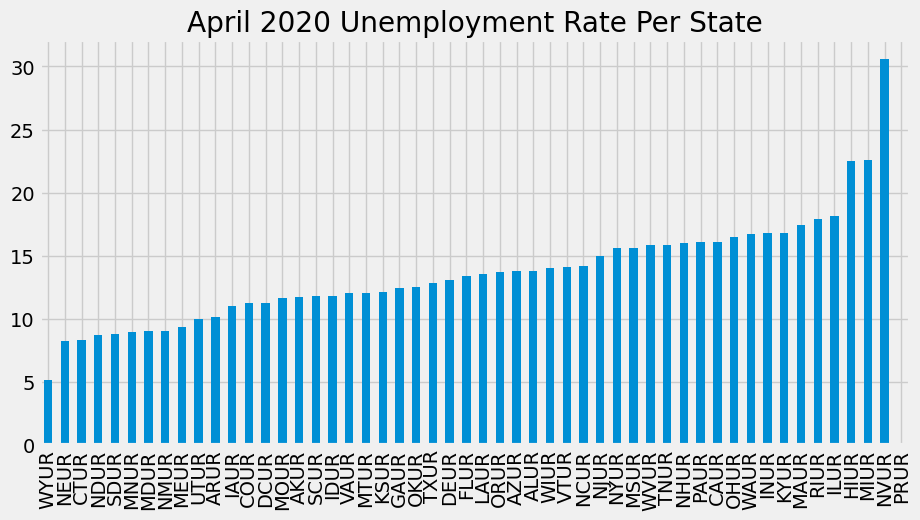

In [293]:
# T = Transpose then sort
ax = uemp_states.loc[uemp_states.index =='2020-04-01'].T.sort_values('2020-04-01').plot(kind='bar', figsize=(10,5), title = 'April 2020 Unemployment Rate Per State', lw=1)
ax.legend().remove()
plt.show()

In [297]:
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in', '').to_dict()

In [301]:
uemp_states.columns = [id_to_state[c] for c in uemp_states.columns]

In [302]:
uemp_states

,California,Texas,New York,Florida,Pennsylvania,Ohio,Michigan,Alabama,Massachusetts,North Carolina,Illinois,New Jersey,Georgia,Colorado,Arizona,Wisconsin,Virginia,Kentucky,South Carolina,New Mexico,Minnesota,Tennessee,Washington,Maryland,Oregon,West Virginia,Nevada,Arkansas,Oklahoma,Missouri,Alaska,Iowa,Utah,Puerto Rico,Indiana,Louisiana,Hawaii,North Dakota,Montana,the District of Columbia,Mississippi,Maine,Nebraska,Connecticut,Idaho,New Hampshire,Rhode Island,Kansas,Wyoming,Delaware,Vermont,South Dakota
1976-01-01,9.2,5.8,10.3,9.7,8.0,8.1,9.9,6.6,10.5,6.4,6.6,10.3,8.4,5.8,10.2,5.8,6.1,5.6,7.4,8.6,6.0,6.0,8.5,6.4,9.5,7.5,9.2,7.3,5.8,5.9,7.1,4.3,5.8,19.6,6.6,6.3,9.8,3.4,5.8,8.7,6.7,8.7,3.3,9.8,5.6,6.5,7.8,4.2,4.1,8.0,8.6,3.3
1976-02-01,9.2,5.8,10.3,9.7,8.1,8.1,9.9,6.6,10.5,6.4,6.6,10.3,8.4,5.7,10.2,5.8,6.1,5.6,7.4,8.7,6.0,6.0,8.5,6.4,9.5,7.5,9.2,7.3,5.8,5.9,7.1,4.3,5.9,19.5,6.6,6.3,9.8,3.4,5.8,8.7,6.7,8.7,3.3,9.8,5.6,6.5,7.8,4.2,4.1,8.0,8.6,3.3
1976-03-01,9.1,5.9,10.2,9.6,8.1,8.1,9.9,6.6,10.5,6.4,6.6,10.3,8.4,5.7,10.1,5.7,6.1,5.6,7.3,8.7,5.9,6.0,8.4,6.4,9.4,7.5,9.2,7.3,5.8,5.9,7.0,4.3,5.8,19.3,6.5,6.3,9.8,3.4,5.8,8.6,6.6,8.6,3.3,9.8,5.6,6.5,7.7,4.2,4.1,8.0,8.6,3.2
1976-04-01,9.1,5.9,10.2,9.5,8.1,8.0,9.8,6.5,10.3,6.3,6.6,10.3,8.3,5.6,10.0,5.6,6.0,5.6,7.2,8.6,5.8,6.0,8.5,6.4,9.2,7.5,9.0,7.2,5.8,6.0,6.9,4.2,5.8,19.0,6.3,6.4,9.7,3.5,5.8,8.5,6.4,8.6,3.2,9.6,5.6,6.5,7.7,4.2,4.0,8.1,8.6,3.1
1976-05-01,9.0,5.9,10.1,9.3,8.1,7.8,9.6,6.4,10.1,6.1,6.6,10.3,8.1,5.6,9.8,5.5,5.9,5.5,7.0,8.6,5.7,5.9,8.5,6.5,9.1,7.4,8.9,7.1,5.7,6.0,6.9,4.1,5.7,18.9,6.0,6.5,9.4,3.6,5.8,8.4,6.3,8.5,3.1,9.4,5.6,6.5,7.7,4.2,3.9,8.3,8.5,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-01,5.2,4.1,4.3,3.3,3.4,4.5,4.4,2.8,3.5,3.7,5.2,4.7,3.4,3.9,3.4,3.0,2.7,4.7,3.9,4.0,3.2,3.0,4.9,2.8,4.1,4.2,5.4,3.3,3.5,3.8,4.5,2.8,3.2,5.8,4.0,3.9,2.9,2.2,3.1,5.5,2.7,2.8,2.6,3.6,3.5,2.5,4.5,3.2,2.9,4.1,2.1,2.0
2024-08-01,5.3,4.1,4.4,3.3,3.4,4.5,4.5,2.8,3.7,3.8,5.3,4.8,3.6,4.0,3.4,2.9,2.8,4.8,4.3,4.1,3.3,3.1,4.8,2.9,4.0,4.2,5.5,3.3,3.4,3.9,4.6,2.9,3.3,5.7,4.2,3.9,2.9,2.3,3.2,5.7,2.7,2.8,2.7,3.4,3.5,2.6,4.6,3.3,3.0,4.2,2.2,2.0
2024-09-01,5.3,4.1,4.4,3.3,3.4,4.5,4.5,2.9,3.8,3.8,5.3,4.7,3.6,4.0,3.5,2.9,2.9,4.9,4.5,4.2,3.4,3.2,4.8,2.9,4.0,4.2,5.6,3.3,3.4,3.9,4.5,2.9,3.5,5.5,4.3,3.9,2.9,2.3,3.3,5.7,2.8,2.8,2.7,3.2,3.6,2.5,4.6,3.3,3.1,4.2,2.2,2.0
2024-10-01,5.4,4.1,4.4,3.3,3.4,4.3,4.6,2.9,3.9,3.7,5.3,4.7,3.6,4.1,3.6,2.9,2.9,5.0,4.7,4.3,3.4,3.3,4.7,3.0,4.0,4.2,5.7,3.3,3.3,3.8,4.6,3.0,3.5,5.4,4.4,4.1,2.9,2.4,3.3,5.7,2.9,2.9,2.7,3.0,3.7,2.5,4.6,3.4,3.2,4.0,2.3,1.9


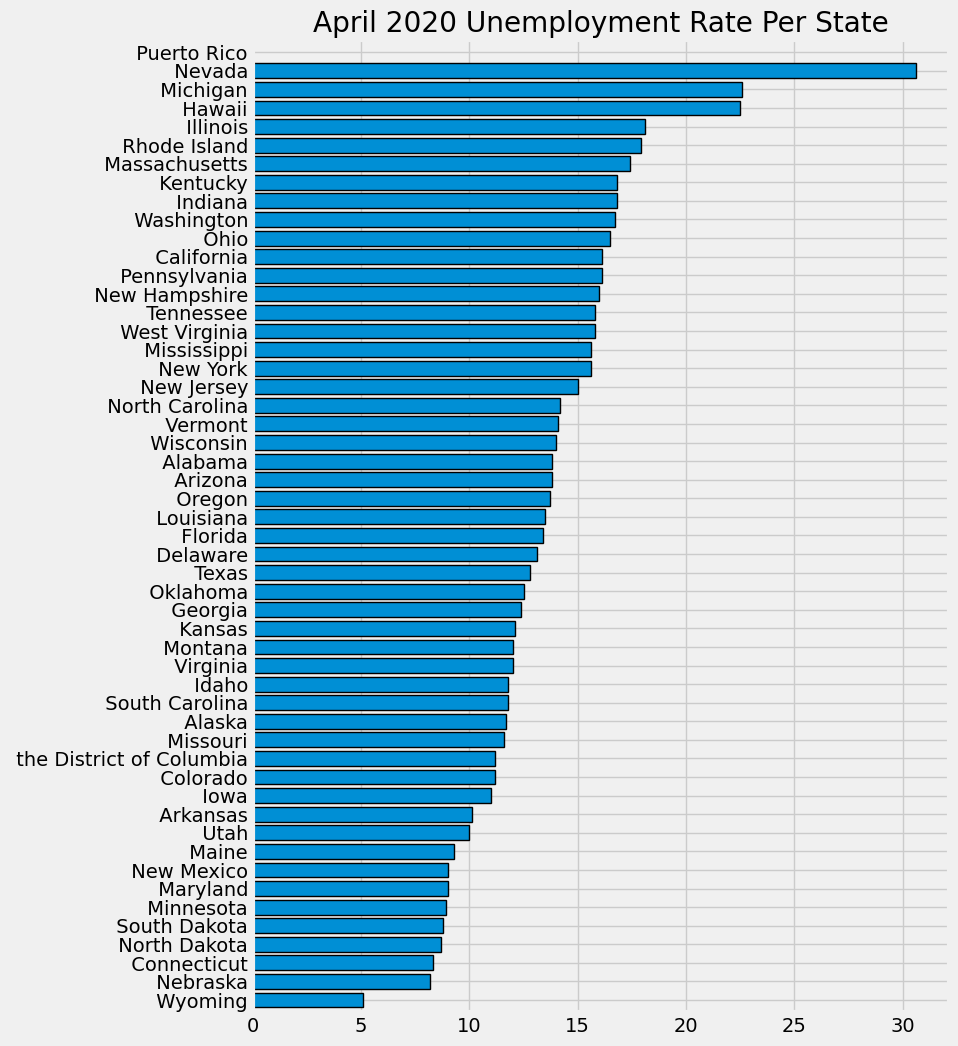

In [315]:
# T = Transpose then sort
# Drop Puerto Rico row

ax = uemp_states.loc[uemp_states.index =='2020-04-01'].T.sort_values('2020-04-01').plot(kind='barh', figsize=(8,12), width = 0.8, edgecolor = 'black',  title = 'April 2020 Unemployment Rate Per State', lw=1)
ax.legend().remove()
plt.show()

# Pull Participation Rate

In [448]:
# Step 1: Filter rows that contain 'labor force participation rate for'
# and exclude titles with "Women" or "Men" after "for"
filtered_df = part_df[
    part_df['title'].str.contains(r'labor force participation rate for (?!Women|Men)', case=False, na=False, regex=True)
    & (part_df['seasonal_adjustment'] == 'Seasonally Adjusted')
]

# Step 2: Extract state names
filtered_df['state'] = filtered_df['title'].str.extract(r'for\s+(.*)')

# Step 3: Display results
print(filtered_df[['id', 'title', 'state', 'seasonal_adjustment']])



                id                                              title  \
series id                                                               
LBSSA06    LBSSA06      Labor Force Participation Rate for California   
LBSSA01    LBSSA01         Labor Force Participation Rate for Alabama   
LBSSA36    LBSSA36        Labor Force Participation Rate for New York   
LBSSA26    LBSSA26        Labor Force Participation Rate for Michigan   
LBSSA28    LBSSA28     Labor Force Participation Rate for Mississippi   
LBSSA48    LBSSA48           Labor Force Participation Rate for Texas   
LBSSA12    LBSSA12         Labor Force Participation Rate for Florida   
LBSSA21    LBSSA21        Labor Force Participation Rate for Kentucky   
LBSSA39    LBSSA39            Labor Force Participation Rate for Ohio   
LBSSA55    LBSSA55       Labor Force Participation Rate for Wisconsin   
LBSSA42    LBSSA42    Labor Force Participation Rate for Pennsylvania   
LBSSA25    LBSSA25   Labor Force Participation Rate

<ipython-input-448-4a88ca4bd6b6>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [449]:
filtered_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes,state
series id,,,,,,,,,,,,,,,,
LBSSA06,LBSSA06,2024-12-25,2024-12-25,Labor Force Participation Rate for California,1976-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-20 09:01:05-06:00,21,A state's labor-force participation rate is th...,California
LBSSA01,LBSSA01,2024-12-25,2024-12-25,Labor Force Participation Rate for Alabama,1976-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-20 09:01:07-06:00,13,A state's labor-force participation rate is th...,Alabama
LBSSA36,LBSSA36,2024-12-25,2024-12-25,Labor Force Participation Rate for New York,1976-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-20 09:01:04-06:00,23,A state's labor-force participation rate is th...,New York
LBSSA26,LBSSA26,2024-12-25,2024-12-25,Labor Force Participation Rate for Michigan,1976-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-20 09:01:03-06:00,22,A state's labor-force participation rate is th...,Michigan
LBSSA28,LBSSA28,2024-12-25,2024-12-25,Labor Force Participation Rate for Mississippi,1976-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-20 09:01:02-06:00,21,A state's labor-force participation rate is th...,Mississippi
LBSSA48,LBSSA48,2024-12-25,2024-12-25,Labor Force Participation Rate for Texas,1976-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-20 09:01:04-06:00,20,A state's labor-force participation rate is th...,Texas
LBSSA12,LBSSA12,2024-12-25,2024-12-25,Labor Force Participation Rate for Florida,1976-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-20 09:01:03-06:00,20,A state's labor-force participation rate is th...,Florida
LBSSA21,LBSSA21,2024-12-25,2024-12-25,Labor Force Participation Rate for Kentucky,1976-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-20 09:01:03-06:00,20,A state's labor-force participation rate is th...,Kentucky
LBSSA39,LBSSA39,2024-12-25,2024-12-25,Labor Force Participation Rate for Ohio,1976-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-20 09:01:09-06:00,14,A state's labor-force participation rate is th...,Ohio


In [450]:
filtered_df.shape


(51, 16)

In [452]:
part_id_to_state = filtered_df['title'].str.replace('Labor Force Participation Rate for', '').to_dict()

all_results = []

for myid in filtered_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)

part_states = pd.concat(all_results, axis=1)

part_states.columns = [part_id_to_state[c] for c in part_states.columns]

In [455]:
part_states

,California,Alabama,New York,Michigan,Mississippi,Texas,Florida,Kentucky,Ohio,Wisconsin,Pennsylvania,Massachusetts,West Virginia,Minnesota,Tennessee,Maryland,Maine,North Carolina,Illinois,Louisiana,Georgia,South Carolina,Colorado,Utah,Virginia,Indiana,Missouri,New Jersey,Iowa,Alaska,Washington,Arizona,New Mexico,Idaho,Arkansas,Oklahoma,Nebraska,Hawaii,Nevada,Montana,Oregon,New Hampshire,Vermont,Connecticut,North Dakota,South Dakota,Kansas,District Of Columbia,Rhode Island,Delaware,Wyoming
1976-01-01,62.6,57.0,58.0,61.6,58.8,63.8,55.8,60.5,61.7,65.6,58.4,64.8,52.5,65.6,59.6,64.3,62.1,66.5,63.0,56.8,63.7,65.3,67.2,62.8,65.9,64.0,60.5,61.5,64.4,69.0,60.9,59.5,60.8,63.0,57.9,59.3,64.9,69.9,71.3,62.7,62.9,65.9,63.6,64.2,62.6,64.6,65.1,64.4,63.8,62.7,65.3
1976-02-01,62.4,56.9,58.0,61.5,58.6,63.5,55.7,60.3,61.7,65.5,58.3,64.7,52.4,65.5,59.4,64.2,61.9,66.3,63.0,56.6,63.6,65.2,67.0,62.6,65.8,63.9,60.3,61.4,64.3,68.4,60.7,59.2,60.5,62.8,57.8,59.2,64.9,69.6,70.8,62.5,62.7,65.6,63.4,64.1,62.4,64.4,65.0,64.5,63.7,62.5,64.9
1976-03-01,62.2,56.8,58.0,61.5,58.5,63.4,55.5,60.2,61.7,65.4,58.3,64.6,52.3,65.4,59.3,64.1,61.9,66.2,62.9,56.5,63.5,65.0,66.8,62.5,65.6,63.8,60.3,61.4,64.2,67.8,60.6,59.1,60.3,62.7,57.7,59.1,64.8,69.6,70.5,62.4,62.5,65.6,63.2,64.0,62.3,64.4,64.9,64.5,63.6,62.5,64.7
1976-04-01,62.2,56.8,58.0,61.6,58.5,63.5,55.5,60.1,61.6,65.4,58.3,64.6,52.3,65.4,59.3,64.1,61.8,66.2,62.9,56.4,63.5,64.9,66.6,62.5,65.5,63.8,60.4,61.5,64.1,67.9,60.6,59.1,60.3,62.7,57.7,59.0,64.8,69.4,70.4,62.3,62.4,65.7,63.5,64.1,62.5,64.3,65.0,64.5,63.7,62.4,64.9
1976-05-01,62.3,56.8,58.1,61.7,58.5,63.6,55.4,60.1,61.6,65.5,58.3,64.6,52.2,65.5,59.4,64.1,61.7,66.3,63.0,56.4,63.6,64.7,66.5,62.6,65.4,63.9,60.6,61.6,64.1,67.9,60.7,59.1,60.3,62.8,57.7,59.0,64.8,69.3,70.5,62.2,62.5,66.0,63.6,64.3,62.6,64.3,65.1,64.4,63.6,62.4,65.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-01,62.0,57.5,61.3,62.4,54.2,64.4,58.8,57.6,62.3,65.5,62.9,66.1,55.1,67.7,59.5,65.5,59.8,60.4,65.0,58.6,61.8,57.5,67.9,68.6,66.1,62.5,63.8,64.7,66.4,64.8,63.6,62.3,57.4,62.9,57.9,63.1,68.4,59.7,62.7,62.9,63.0,65.6,65.7,64.4,68.9,67.5,66.1,72.5,65.2,59.8,63.1
2024-08-01,62.1,57.5,61.3,62.3,54.4,64.4,58.6,57.7,62.3,65.5,62.7,66.3,55.1,67.7,59.5,65.5,59.9,60.3,65.0,58.6,61.8,57.6,67.9,68.5,66.0,62.7,63.9,64.8,66.3,64.9,63.5,62.3,57.5,63.1,58.0,63.1,68.3,59.6,62.7,62.9,63.0,65.6,65.7,64.2,68.8,67.5,66.2,72.3,65.2,59.6,63.2
2024-09-01,62.1,57.5,61.2,62.3,54.5,64.5,58.5,57.9,62.4,65.6,62.4,66.4,55.1,67.7,59.4,65.5,60.1,60.2,65.0,58.6,61.8,57.6,67.9,68.4,66.0,63.0,63.9,64.7,66.3,64.9,63.3,62.2,57.5,63.2,58.1,63.1,68.3,59.6,62.7,62.9,63.0,65.7,65.7,64.1,68.8,67.5,66.2,72.0,65.1,59.5,63.2
2024-10-01,62.1,57.6,61.2,62.2,54.7,64.6,58.3,58.1,62.5,65.7,62.2,66.4,55.0,67.7,59.4,65.6,60.2,60.1,65.1,58.5,61.7,57.6,67.9,68.3,66.0,63.2,63.9,64.6,66.2,64.9,63.2,62.1,57.6,63.3,58.1,63.0,68.4,59.7,62.7,62.9,63.0,65.7,65.6,64.1,68.8,67.6,66.4,71.8,65.0,59.3,63.2


# Plot Unemployment vs Participation

AttributeError: 'numpy.ndarray' object has no attribute 'get_figure'

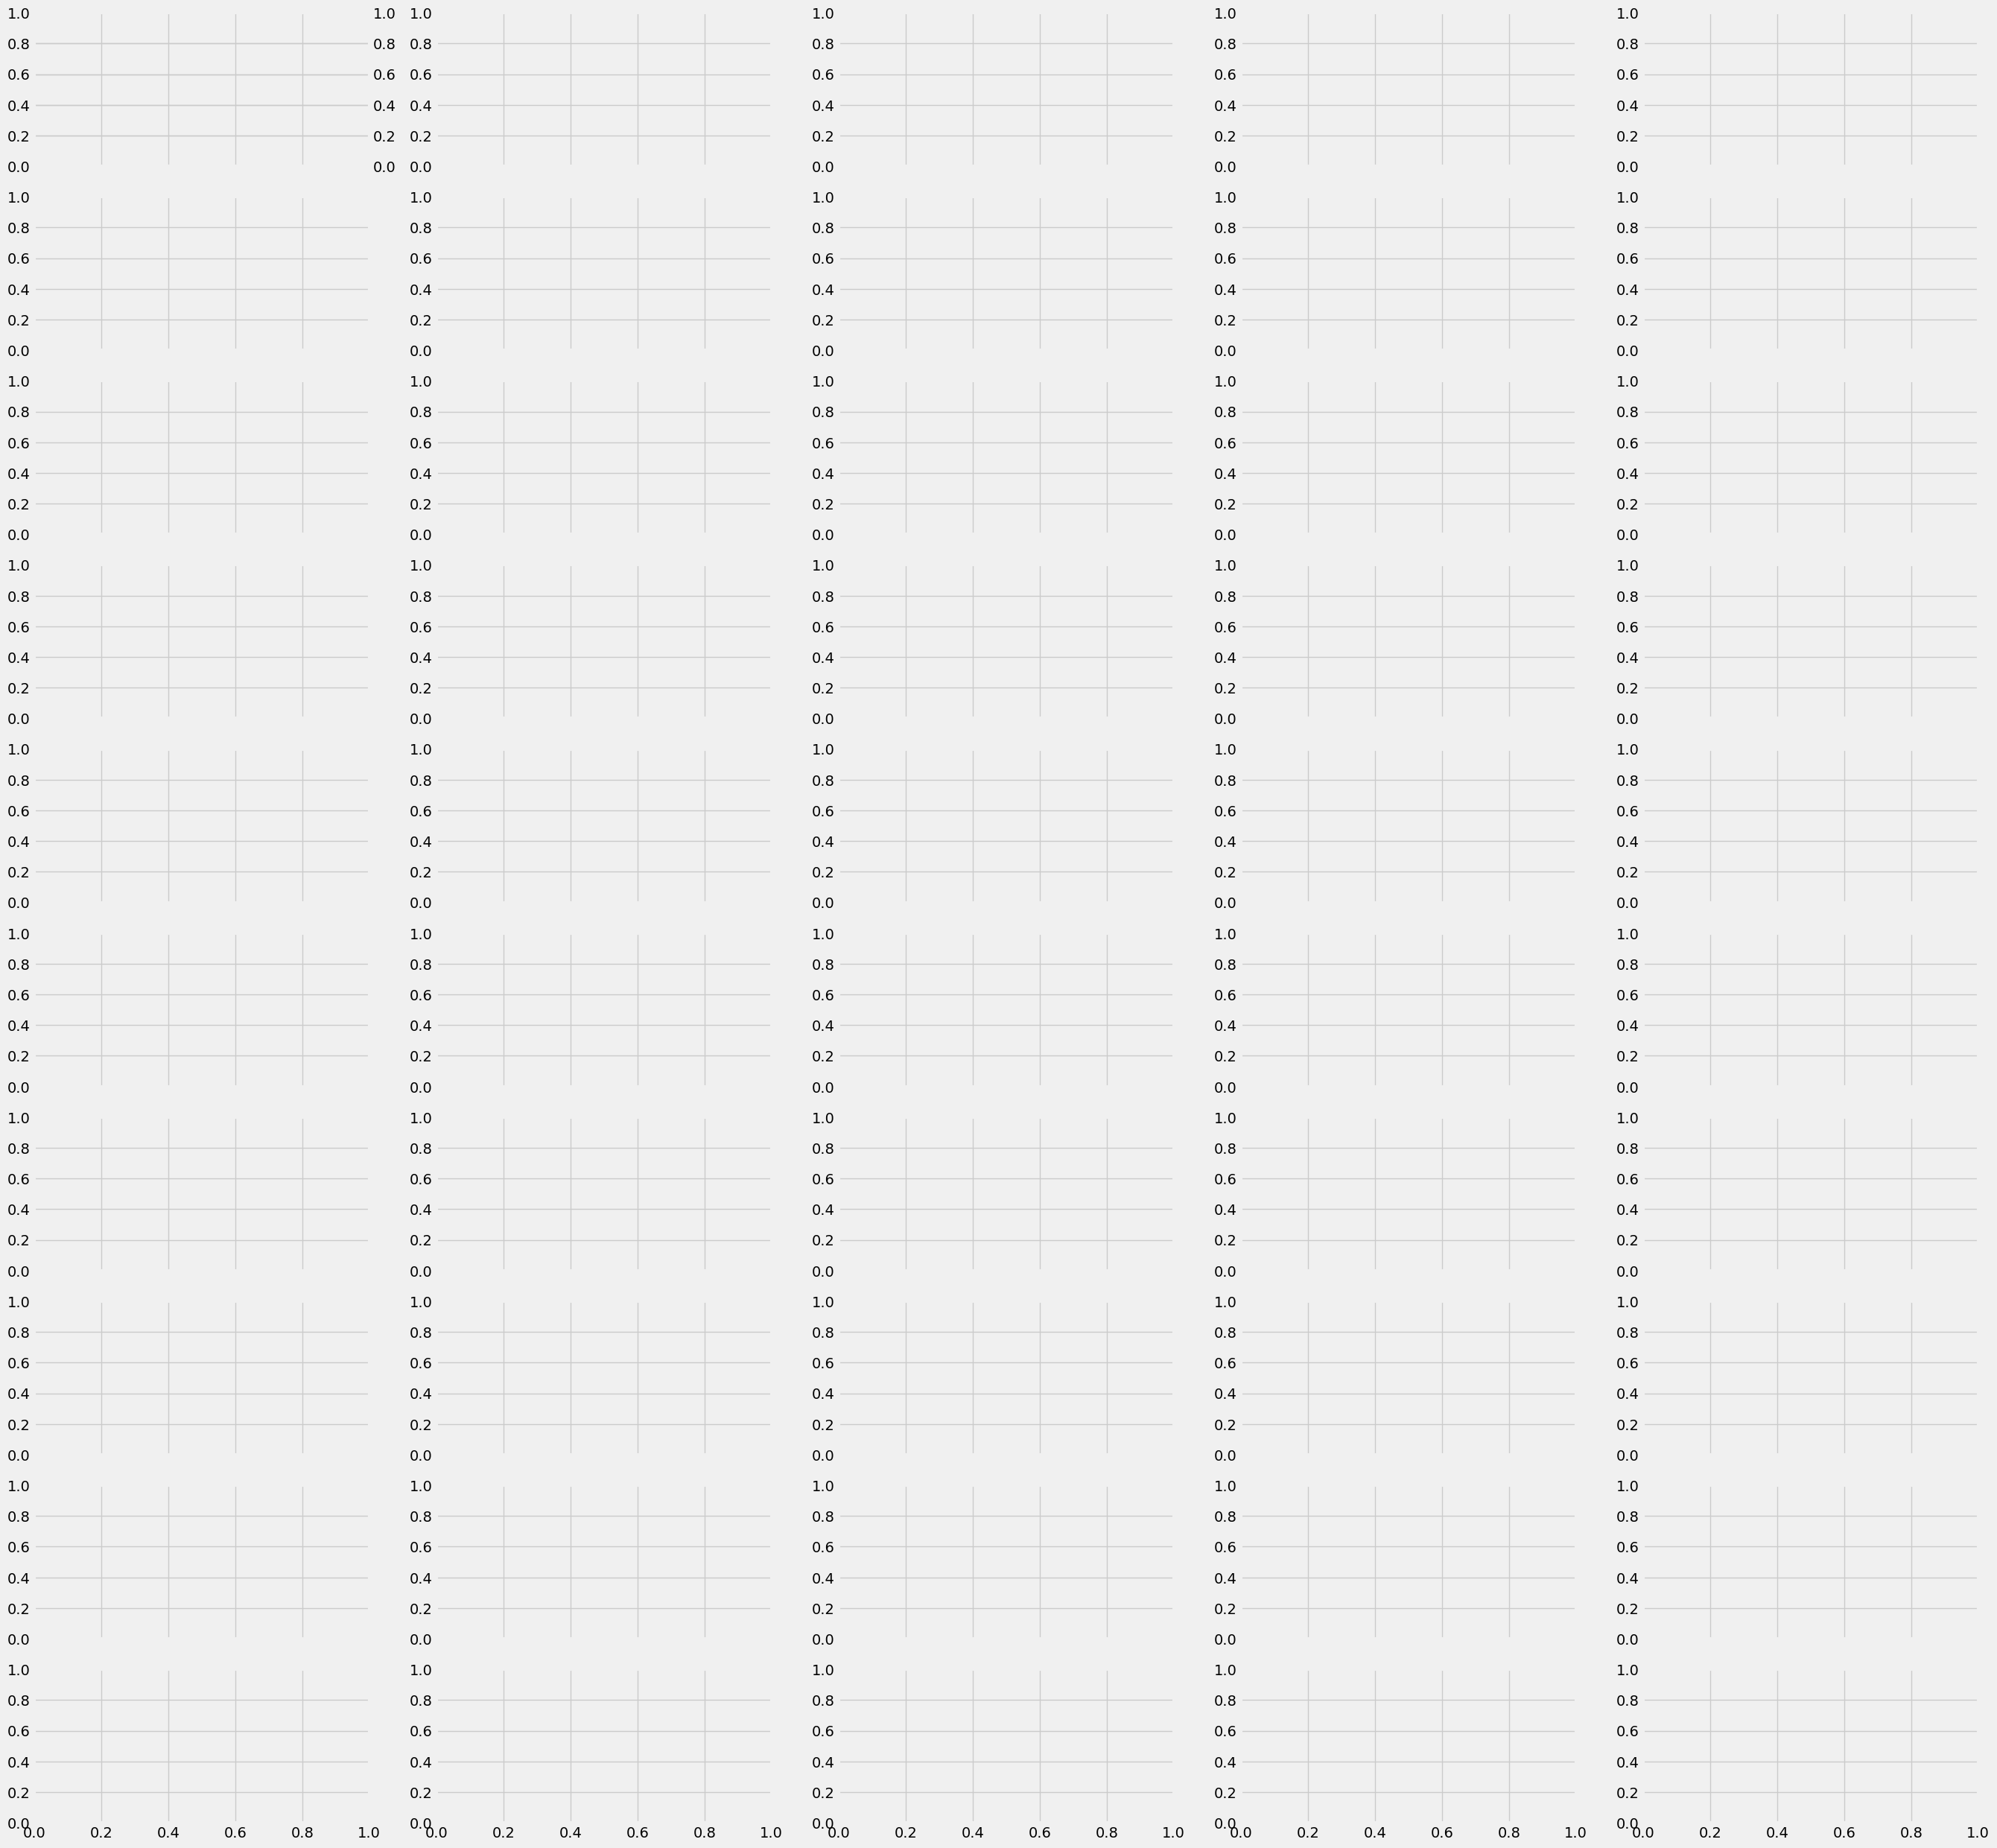

In [479]:

# Create a figure and axis
fig, axs = plt.subplots(10,5, figsize=(30, 30), sharex = True)
axs = axs.flatten()

i=0
for state in uemp_states.columns:
  if state == "Puerto Rico":
    continue
  # Create a second y-axis
  ax2 = axs[i].twinx()

  # Plot unemployment data on the first y-axis
  uemp_states.query('index >= 2020 and index < 2022')[state].plot(ax=ax[i], label='Unemployment')

  # Plot participation data on the second y-axis
  part_states.query('index >= 2020 and index < 2022')[state].plot(ax=ax[i], label='Participation', color='orange')

  # Add legends
  ax.legend(loc='upper left')
  ax2.legend(loc='upper right')

  # Disable grid for the second y-axis
  ax2.grid(False)
  ax.set_title(state)

  # Display the plot
  plt.tight_layout()
  plt.show()


